In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random

import json 
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings("ignore")
plt.style.context('fivethirtyeight')
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'iframe'


plt.rcParams["figure.figsize"] = (15,8)

In [2]:
df=pd.read_csv("train_ing_z.csv")

In [3]:
def check(df):
    display(df.head())
    print("~"*120)
    print(df.shape)
    print("~"*120)
    display(df.info())
    print("~"*120)
    display(df.describe())
    print("~"*120)
    display(df.isnull().sum()/(df.shape[0])*100)
check(df)

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_87942,ing_z,0.000,NaN,8.0,499.2607,Obery Farms,location 959,3.8,NaN,240.0,2.4,1021.0,NaN,3.1
1,2016-01-01 00:00:00,fid_66870,ing_z,0.000,1953.0,10.0,5295.0063,Obery Farms,location 959,3.8,NaN,240.0,2.4,1021.0,NaN,3.1
2,2016-01-01 00:00:00,fid_66062,ing_z,96.978,NaN,10.0,2992.0340,Obery Farms,location 959,3.8,NaN,240.0,2.4,1021.0,NaN,3.1
3,2016-01-01 00:00:00,fid_75323,ing_z,19.597,1958.0,13.0,9334.9860,Obery Farms,location 959,3.8,NaN,240.0,2.4,1021.0,NaN,3.1
4,2016-01-01 00:00:00,fid_75397,ing_z,100.000,1958.0,17.0,12976.9700,Obery Farms,location 959,3.8,NaN,240.0,2.4,1021.0,NaN,3.1


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(1290364, 16)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290364 entries, 0 to 1290363
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   date                        1290364 non-null  object 
 1   farm_id                     1290364 non-null  object 
 2   ingredient_type             1290364 non-null  object 
 3   yield                       1290364 non-null  float64
 4   operations_commencing_year  567002 non-null   float64
 5   num_processing_plants       227618 non-null   float64
 6   farm_area                   1290364 non-null  float64
 7   farming_company             1290364 non-null  object 
 8   deidentified_location       1290364 

None

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,yield,operations_commencing_year,num_processing_plants,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,1.290364e+06,567002.000000,227618.000000,1.290364e+06,1.287352e+06,774518.000000,1.229269e+06,1.287128e+06,1.275501e+06,1.102710e+06,1.284879e+06
mean,3.785042e+02,1971.043638,9.006129,1.055377e+04,1.718658e+01,1.199543,1.756217e+02,4.689789e+00,1.014443e+03,5.234622e-01,3.126595e+00
std,2.482995e+03,25.572731,2.976445,9.361275e+03,1.158955e+01,1.836257,1.128787e+02,9.087098e+00,7.345206e+00,4.855797e+00,2.062691e+00
min,0.000000e+00,1900.000000,5.000000,4.992607e+02,-2.890000e+01,0.000000,0.000000e+00,-3.500000e+01,9.735000e+02,-1.000000e+00,0.000000e+00
25%,0.000000e+00,1958.000000,6.000000,4.587922e+03,8.900000e+00,0.000000,8.000000e+01,-1.700000e+00,1.009500e+03,0.000000e+00,2.100000e+00
50%,3.796495e+01,1968.000000,9.000000,8.019666e+03,1.740000e+01,0.000000,1.800000e+02,4.400000e+00,1.014000e+03,0.000000e+00,3.100000e+00
75%,2.328780e+02,1989.000000,10.000000,1.408753e+04,2.560000e+01,2.000000,2.700000e+02,1.170000e+01,1.019000e+03,0.000000e+00,4.100000e+00
max,1.601870e+05,2012.000000,17.000000,6.799988e+04,4.720000e+01,9.000000,3.600000e+02,2.610000e+01,1.046000e+03,3.330000e+02,1.850000e+01


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


date                           0.000000
farm_id                        0.000000
ingredient_type                0.000000
yield                          0.000000
operations_commencing_year    56.058756
num_processing_plants         82.360171
farm_area                      0.000000
farming_company                0.000000
deidentified_location          0.000000
temp_obs                       0.233423
cloudiness                    39.976782
wind_direction                 4.734711
dew_temp                       0.250782
pressure_sea_level             1.151846
precipitation                 14.542718
wind_speed                     0.425074
dtype: float64

In [4]:
data=df.copy()

In [5]:
df.columns

Index(['date', 'farm_id', 'ingredient_type', 'yield',
       'operations_commencing_year', 'num_processing_plants', 'farm_area',
       'farming_company', 'deidentified_location', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [115]:
weather=["date","farm_id",'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed']


# What is intermittancy in a time series and why does it matter?
Intermittancy matters for several reasons:

Sparse data sets have high dimensionality and this influences the effectiveness of various models.
The evaluation metric (𝑹𝑴𝑺𝑺𝑬 - discussed soon) will take this into account so we can't get a high acccuracy by guessing a lot of 0's.

In [6]:
group=df.groupby(["deidentified_location"],as_index=False)["farm_id"].count().dropna()
group['ingredient'] = 'Ingredient-z'
fig = px.treemap(group, path=["ingredient",'deidentified_location'], values='farm_id',
                  color='farm_id',
                  color_continuous_scale= px.colors.sequential.Sunset,
                  title='Location wise: Distribution of farms')
fig.update_layout(template='seaborn')
fig.show()

# Question Based Exploratory Data Analysis

In [ ]:
companies---->Locations-----> farms

# How do yied differ from different companies & locations?

In [9]:
def disp_boxplot(data, title, xlabel, ylabel):
    plt.figure(figsize=(22,10))
    
    sns.set_style('whitegrid')
    sns.set_context('poster')
    palette = sns.color_palette("mako_r", 6)
    
    ax = sns.boxplot(data=data, palette = palette)
    ax.set(title = title,
          xlabel = xlabel,
          ylabel = ylabel)
    
    try:
        ax.axhline(y = data.mean().mean(), color = 'b', label = 'Mean of all datapoints', linestyle = '--', linewidth = 1.5)
        ax.ahline(y = data.median().median(), color = 'g', label = 'Median of all datapoints', linestyle = '--', linewidth = 1.5)
    except:
        pass
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
    
    plt.legend()
    plt.show()


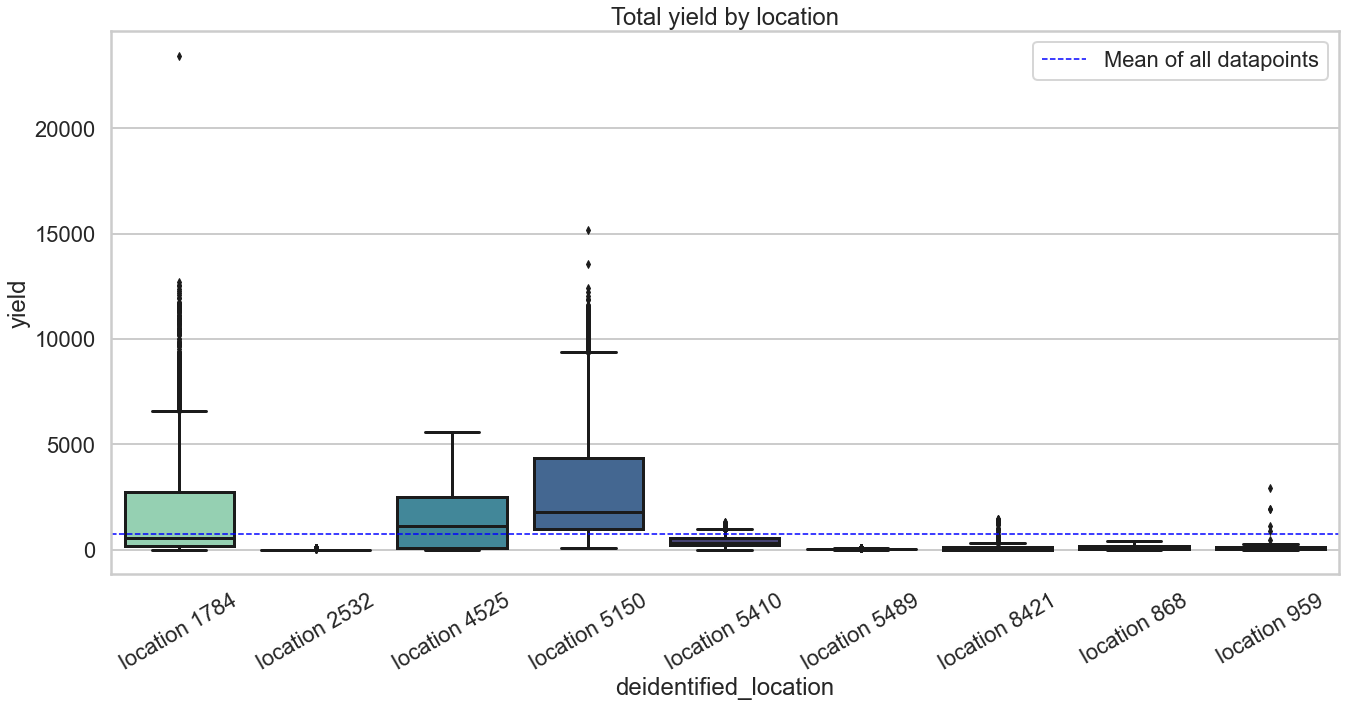

In [10]:
location_wise=pd.pivot_table(data=df,columns="deidentified_location",index="date",values="yield")
disp_boxplot(data = location_wise, title = 'Total yield by location',
            xlabel = "deidentified_location", ylabel = "yield")

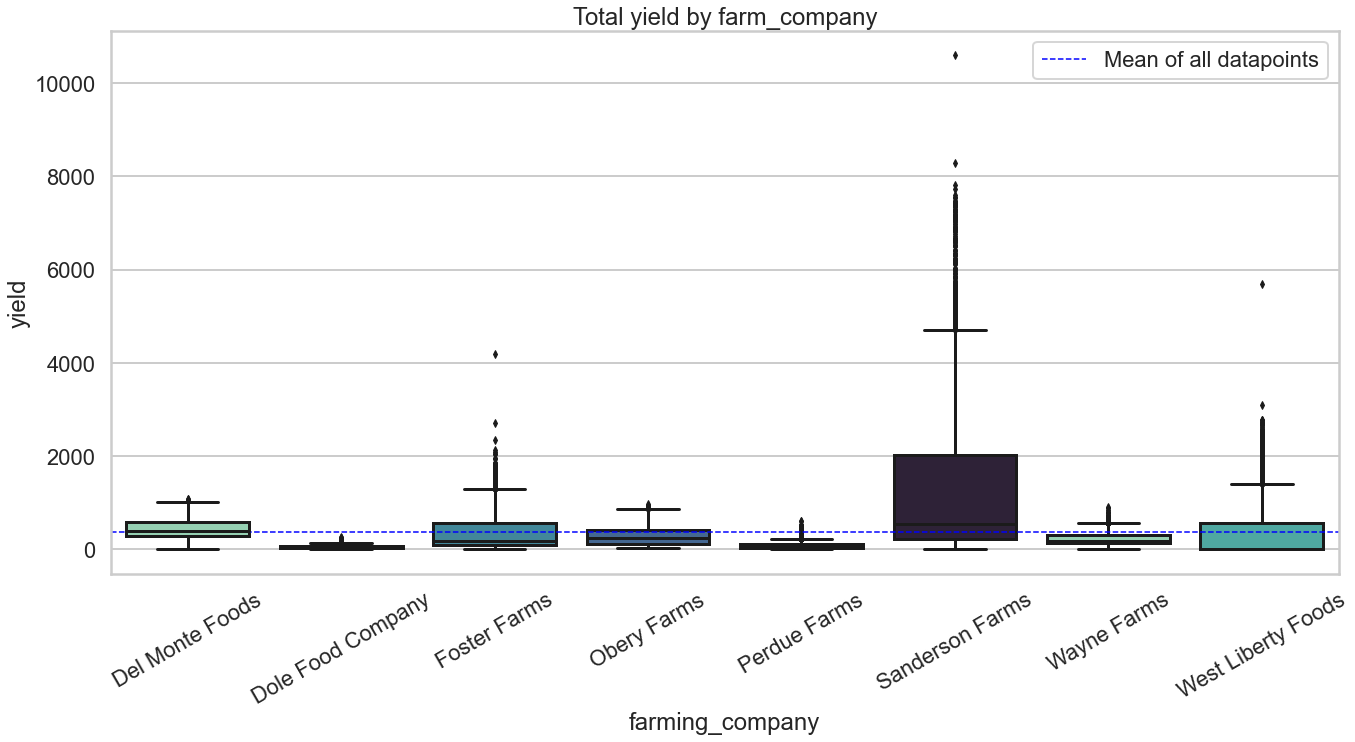

In [11]:
farm_company_wise=pd.pivot_table(data=df,columns="farming_company",index="date",values="yield")
disp_boxplot(data = farm_company_wise, title = 'Total yield by farm_company',
            xlabel = "farming_company", ylabel = "yield")

# Top & Bottom 10 farms produced more yield

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
top=df.groupby("farm_id")["yield"].sum()
top=top.reset_index()
bottom=top.sort_values(by="yield").iloc[:10]
top=top.sort_values(by="yield",ascending=False).iloc[:10]


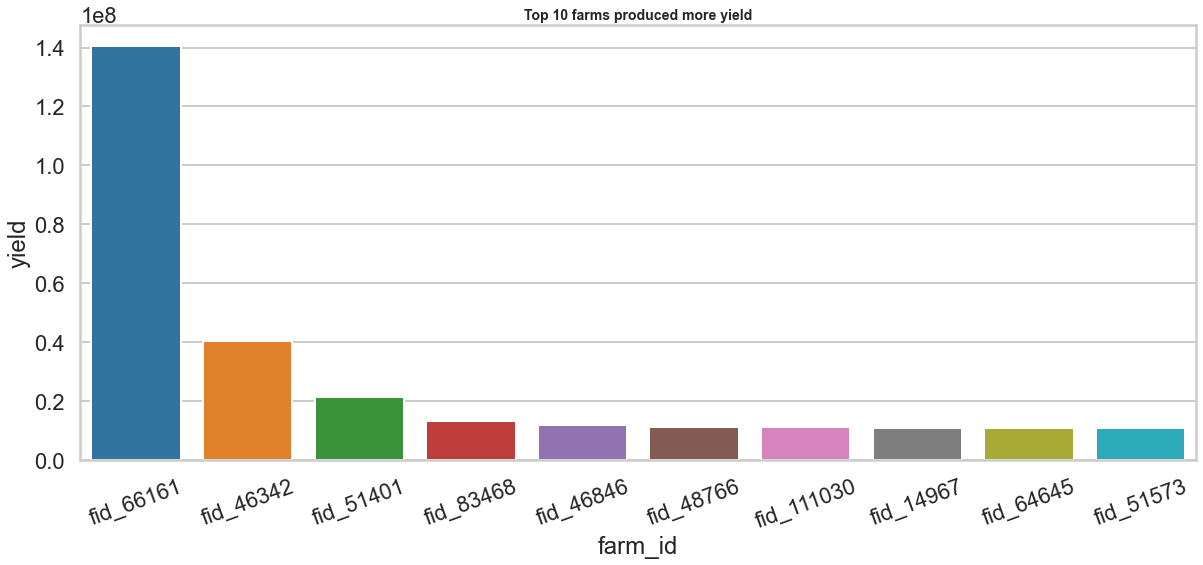

In [13]:
plt.figure(figsize=(20,8))
plt.title("Top 10 farms produced more yield",fontweight='bold', fontsize=14)
ax=sns.barplot(data=top,x="farm_id",y="yield")
#ax.bar_label(ax.containers[0])
plt.xticks(rotation=20)
plt.show()

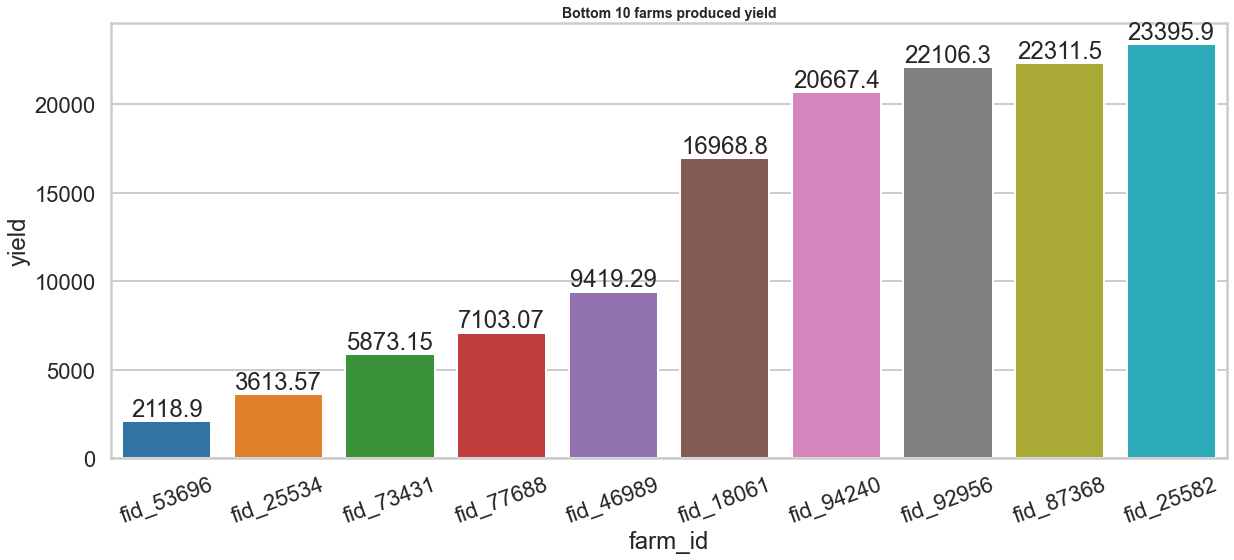

In [15]:
plt.figure(figsize=(20,8))
plt.title("Bottom 10 farms produced yield",fontweight='bold', fontsize=14)
ax=sns.barplot(data=bottom,x="farm_id",y="yield")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=20)
plt.show()

# Any seasonality with weather data?

In [125]:
fd=df[weather].copy()
fd["date"]=pd.to_datetime(fd["date"]).dt.date
fd=fd.groupby(["date","farm_id"])[weather].mean().reset_index()
df=fd

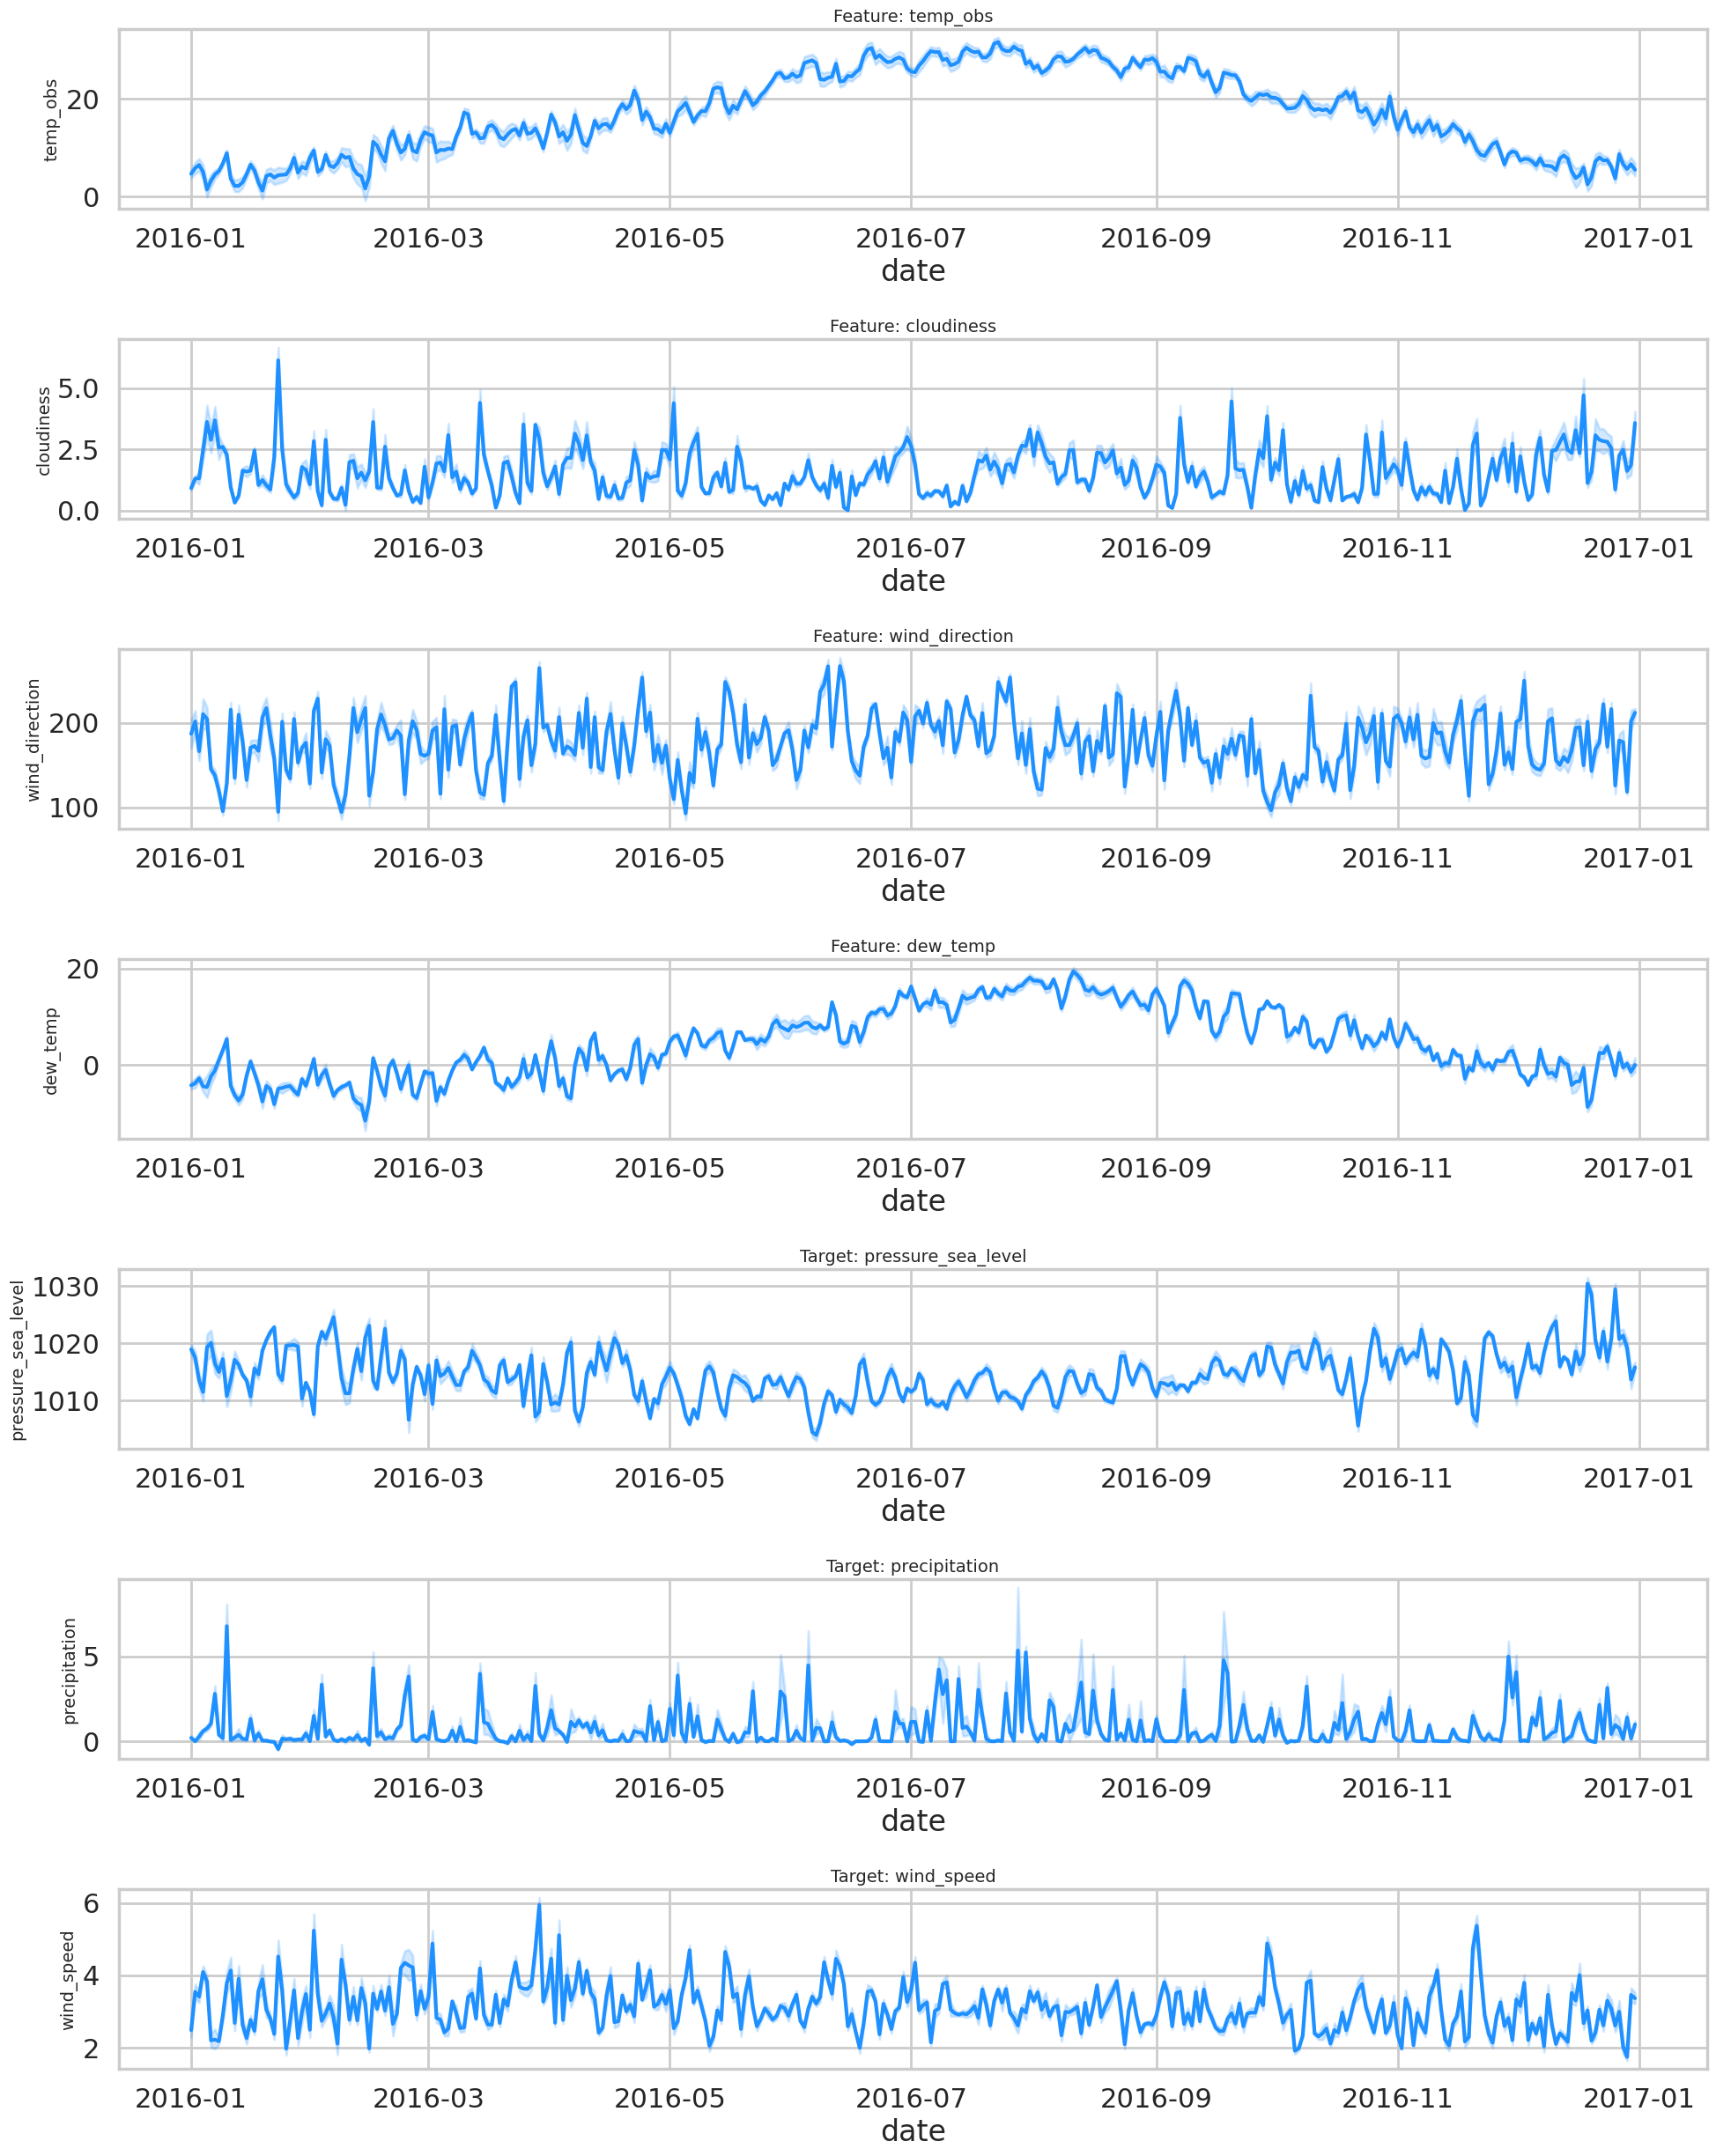

In [126]:
f, ax = plt.subplots(nrows=7, ncols=1, figsize=(20, 25))

sns.lineplot(x=df.date, y=df.temp_obs.fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: temp_obs', fontsize=14)
ax[0].set_ylabel(ylabel='temp_obs', fontsize=14)


sns.lineplot(x=df.date, y=df.cloudiness.fillna(np.inf), ax=ax[1], color='dodgerblue')
ax[1].set_title('Feature: cloudiness', fontsize=14)
ax[1].set_ylabel(ylabel='cloudiness', fontsize=14)


sns.lineplot(x=df.date, y=df.wind_direction.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: wind_direction', fontsize=14)
ax[2].set_ylabel(ylabel='wind_direction', fontsize=14)


sns.lineplot(x=df.date, y=df.dew_temp.fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: dew_temp', fontsize=14)
ax[3].set_ylabel(ylabel='dew_temp', fontsize=14)


sns.lineplot(x=df.date, y=df.pressure_sea_level.fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: pressure_sea_level', fontsize=14)
ax[4].set_ylabel(ylabel='pressure_sea_level', fontsize=14)

sns.lineplot(x=df.date, y=df.precipitation.fillna(np.inf), ax=ax[5], color='dodgerblue')
ax[5].set_title('Target: precipitation', fontsize=14)
ax[5].set_ylabel(ylabel='precipitation', fontsize=14)

sns.lineplot(x=df.date, y=df.wind_speed.fillna(np.inf), ax=ax[6], color='dodgerblue')
ax[6].set_title('Target: wind_speed', fontsize=14)
ax[6].set_ylabel(ylabel='wind_speed', fontsize=14)

plt.tight_layout()
plt.show()

# How Demand differs based on farm_id?
* Taking 5 random farms to check their demand

In [133]:
data["date"]=pd.to_datetime(data["date"])
data["month"]=data["date"].dt.month
data["day"]=data["date"].dt.day
data["weekday"]=data["date"].dt.weekday
data["date_"]=data["date"].dt.date


In [134]:
pivot=pd.pivot_table(data, values="yield", 
                  index="date_", 
                  columns="farm_id")
farm=pivot.iloc[:,:5]


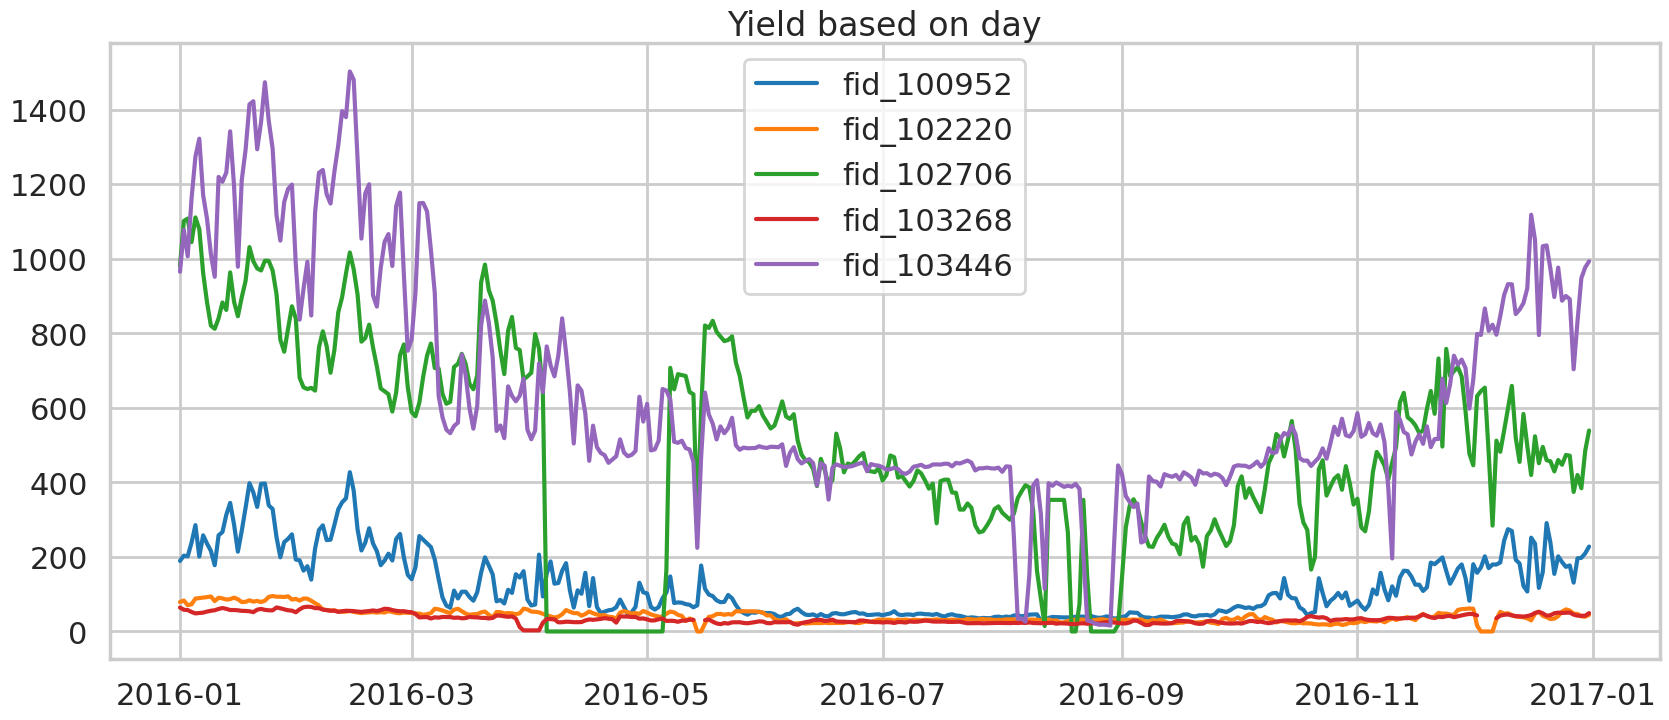

In [135]:
plt.figure(figsize=(20,8))
for i in farm.columns:
    plt.plot(farm.index,farm[i])
    plt.title("Yield based on day")
    plt.xticks()
    plt.yticks()
    plt.legend(farm.columns)
plt.show()


#  Any trend if Yield broken down by time variables?
- Now that we have our example item lets see how it yields by:
    - Day 
    - Day of week
    - Month

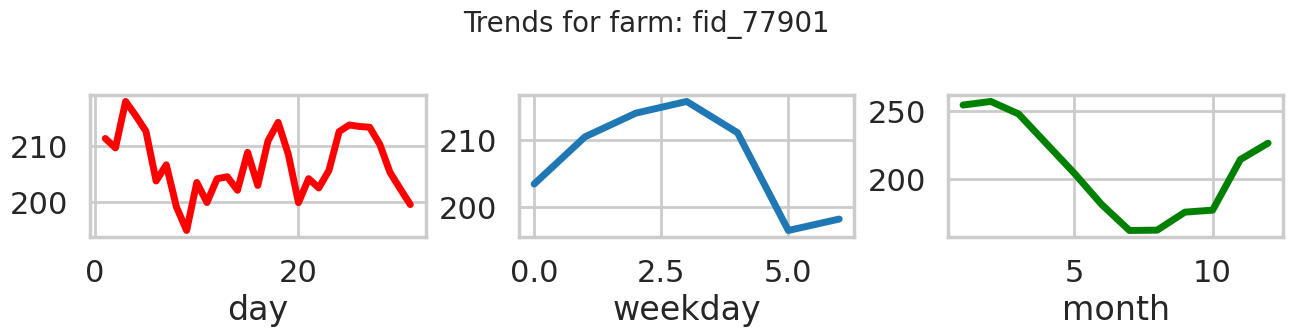

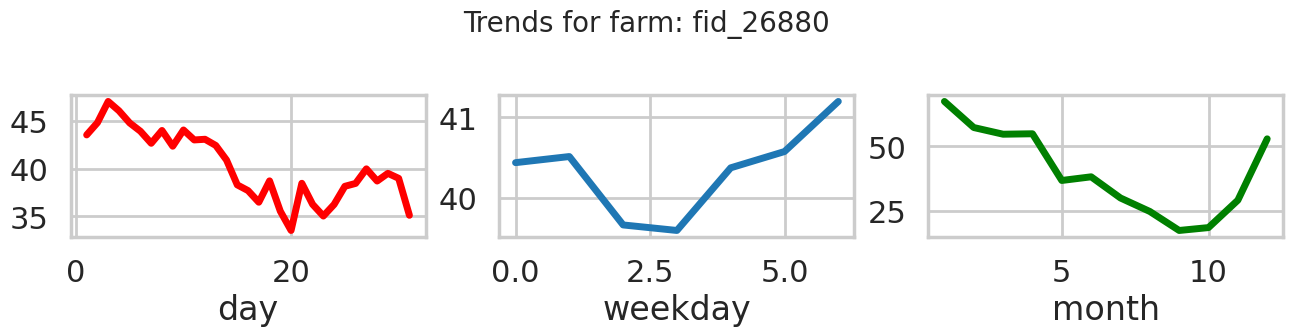

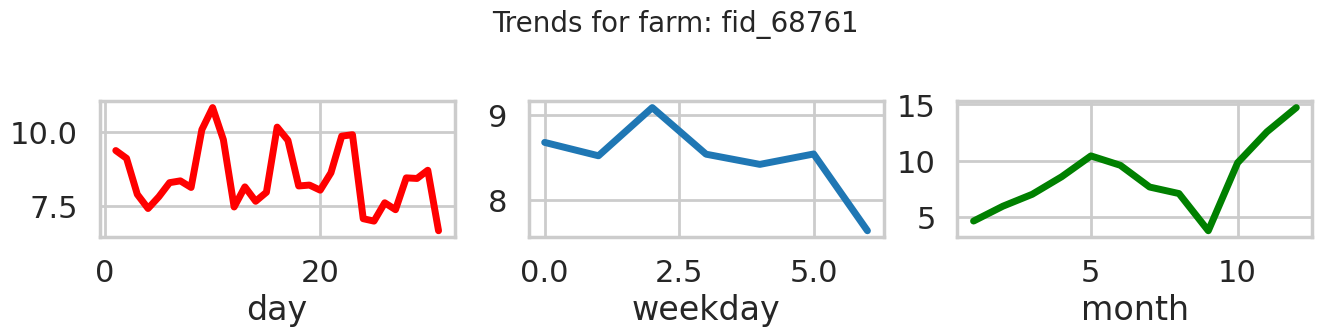

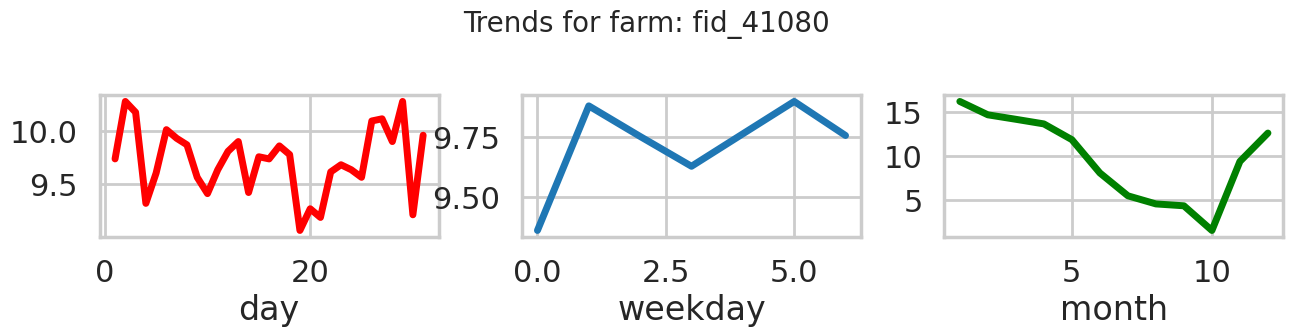

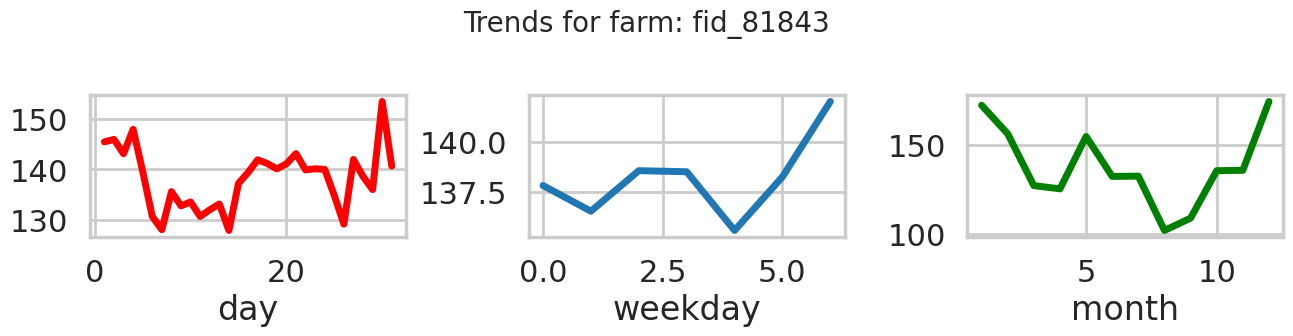

In [138]:
farms=list(data["farm_id"].unique())
for i in range(5):
    num=random.choice(list(range(len(farms))))
    fig, axes=plt.subplots(1,3)
    #plt.title('Avg day, weekly & Monthly demand of '+ farms[num],loc='center')
    data[data["farm_id"]==farms[num]].groupby('day')["yield"].mean().plot(ax=axes[0], figsize=(13,3),lw=5,color="r")
    data[data["farm_id"]==farms[num]].groupby('weekday')["yield"].mean().plot(ax=axes[1],lw=5, figsize=(13,3))
    data[data["farm_id"]==farms[num]].groupby('month')["yield"].mean().plot(ax=axes [2],lw=5, figsize=(13,3),color="g")
    fig.suptitle(f'Trends for farm: {farms[num]}',
                 size=20,
                 y=1.1)
    plt.tight_layout(pad=0.4)
    plt.show()

# Is Yield is biased to location?

In [139]:
data

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,month,day,weekday,date_
0,2016-01-01 00:00:00,fid_87942,ing_z,0.00,NaN,8.00,499.26,Obery Farms,location 959,3.80,NaN,240.00,2.40,1021.00,NaN,3.10,1,1,4,2016-01-01
1,2016-01-01 00:00:00,fid_66870,ing_z,0.00,1953.00,10.00,5295.01,Obery Farms,location 959,3.80,NaN,240.00,2.40,1021.00,NaN,3.10,1,1,4,2016-01-01
2,2016-01-01 00:00:00,fid_66062,ing_z,96.98,NaN,10.00,2992.03,Obery Farms,location 959,3.80,NaN,240.00,2.40,1021.00,NaN,3.10,1,1,4,2016-01-01
3,2016-01-01 00:00:00,fid_75323,ing_z,19.60,1958.00,13.00,9334.99,Obery Farms,location 959,3.80,NaN,240.00,2.40,1021.00,NaN,3.10,1,1,4,2016-01-01
4,2016-01-01 00:00:00,fid_75397,ing_z,100.00,1958.00,17.00,12976.97,Obery Farms,location 959,3.80,NaN,240.00,2.40,1021.00,NaN,3.10,1,1,4,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290359,2016-12-31 23:00:00,fid_113277,ing_z,2476.61,NaN,NaN,15467.33,Sanderson Farms,location 5410,6.10,NaN,190.00,-6.70,1012.50,-1.00,9.80,12,31,5,2016-12-31
1290360,2016-12-31 23:00:00,fid_46846,ing_z,1909.33,NaN,NaN,8101.14,Wayne Farms,location 5410,6.10,NaN,190.00,-6.70,1012.50,-1.00,9.80,12,31,5,2016-12-31
1290361,2016-12-31 23:00:00,fid_26870,ing_z,364.02,NaN,NaN,7867.77,Sanderson Farms,location 5410,6.10,NaN,190.00,-6.70,1012.50,-1.00,9.80,12,31,5,2016-12-31
1290362,2016-12-31 23:00:00,fid_75152,ing_z,156.05,1915.00,NaN,14416.41,Sanderson Farms,location 5150,1.70,NaN,180.00,-5.60,1008.50,-1.00,8.80,12,31,5,2016-12-31


In [148]:
loc=data.groupby(["deidentified_location","farm_id"])['yield'].sum().nlargest(20).reset_index()
display(loc)
top_20=loc.groupby("deidentified_location").count().reset_index()
top_20

,deidentified_location,farm_id,yield
0,location 1784,fid_66161,140482337.36
1,location 5150,fid_46342,40476773.55
2,location 4525,fid_51401,21393072.12
3,location 1784,fid_83468,13221735.53
4,location 5410,fid_46846,11788256.09
5,location 5410,fid_48766,11248444.96
6,location 4525,fid_111030,11146733.65
7,location 5410,fid_14967,10976308.30
8,location 5410,fid_64645,10912729.09
9,location 5410,fid_51573,10834720.10


,deidentified_location,farm_id,yield
0,location 1784,2,2
1,location 4525,2,2
2,location 5150,1,1
3,location 5410,15,15


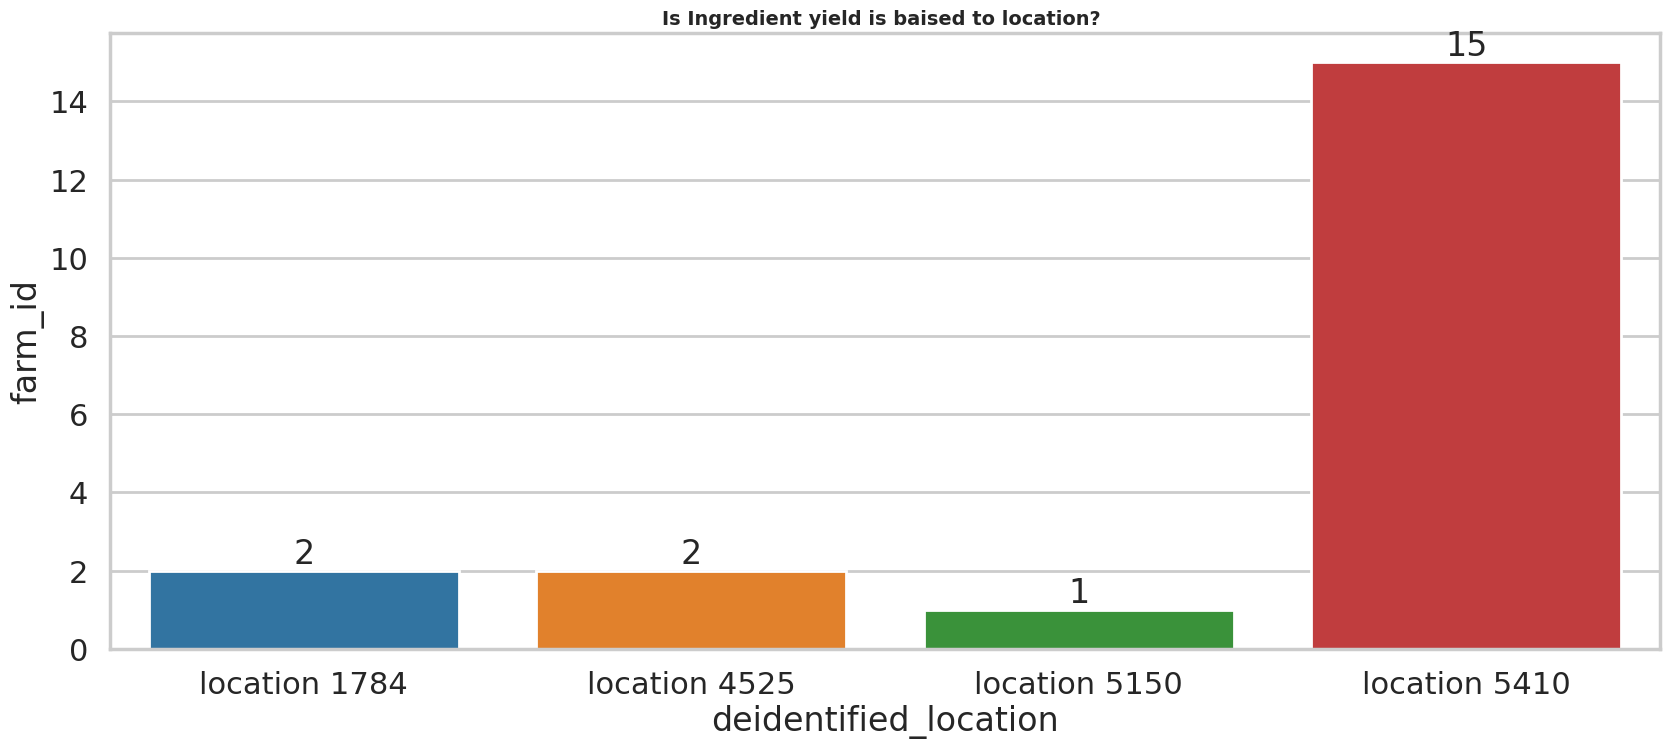

In [150]:
plt.figure(figsize=(20,8))
plt.title("Is yield is baised to location? ",fontweight='bold', fontsize=14)
ax=sns.barplot(data=top_20,x="deidentified_location",y="farm_id")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.show()